In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [495]:
df_new = pd.read_csv('C://Users//taksaa//AReM/train_set_features.csv',sep='\t')
df_new = df_new.drop('Unnamed: 0', 1)
df1_new = pd.read_csv('C://Users//taksaa//AReM/test_set_features.csv',sep='\t')
df1_new = df1_new.drop('Unnamed: 0', 1)

In [496]:
#dropping NAN row 32
df_new= df_new.drop(32)

In [497]:
#Calculating SD of the features extracted from the train set
std_train=df_new.std()

In [498]:
#QD) i
#making a dataframe for LR
df_LR_train=df_new.filter(items=['avg_rss12_min','avg_rss12_mean','avg_rss12_max','var_rss12_min','var_rss12_mean','var_rss12_max','var_rss23_min','var_rss23_mean','var_rss23_max'])

In [499]:
#adding label bending = 1, non bending =0
label=[]
for i in range(0,9):
    label.append("1")
for i in range(9,68):
    label.append("0")
df_LR_train['Label'] = label
df_LR_train.shape

(68, 10)

In [500]:
#adding label bending = 1, non bending =0
label=[]
for i in range(0,9):
    label.append("1")
for i in range(9,68):
    label.append("0")
df_LR_train['Label'] = label
df_LR_train.shape

(68, 10)

In [501]:
x_min=df_LR_train['avg_rss12_min'].values+df_LR_train['var_rss12_min'].values+df_LR_train['var_rss23_min'].values
x_mean=df_LR_train['avg_rss12_mean'].values+df_LR_train['var_rss12_mean'].values+df_LR_train['var_rss23_mean'].values
x_max=df_LR_train['avg_rss12_max'].values+df_LR_train['var_rss12_max'].values+df_LR_train['var_rss23_max'].values
y=[range(0,68)]
color=df_LR_train['Label']

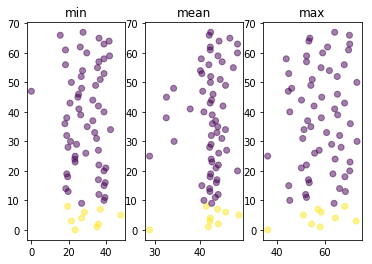

In [502]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.scatter(x_min,y,c=color,alpha=0.5)
plt.title('min')
plt.subplot(1,3,2)
plt.scatter(x_mean,y,c=color,alpha=0.5)
plt.title('mean')
plt.subplot(1,3,3)
plt.scatter(x_max,y,c=color,alpha=0.5)
plt.title('max')
plt.show()

In [503]:
# This function creates chunks and returns them
def chunkify(lst,n):
    return [ lst[i::n] for i in range(n) ]

#splitting in 2
chunks = chunkify(df_LR_train, 2)
half_1=chunks[0]
half_2=chunks[1]

In [504]:
#parameters
x_min=half_1['avg_rss12_min'].values+half_1['var_rss12_min'].values+half_1['var_rss23_min'].values
x_mean=half_1['avg_rss12_mean'].values+half_1['var_rss12_mean'].values+half_1['var_rss23_mean'].values
x_max=half_1['avg_rss12_max'].values+half_1['var_rss12_max'].values+half_1['var_rss23_max'].values
y=[range(0,len(x_min))]
color=half_1['Label']

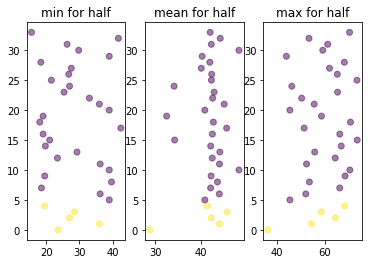

In [505]:
#plotting half
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.scatter(x_min,y,c=color,alpha=0.5)
plt.title('min for half')
plt.subplot(1,3,2)
plt.scatter(x_mean,y,c=color,alpha=0.5)
plt.title('mean for half')
plt.subplot(1,3,3)
plt.scatter(x_max,y,c=color,alpha=0.5)
plt.title('max for half')
plt.show()

In [506]:
for l in range(0,10):
    chunks=chunkify(df_new,l)
    

In [507]:
# Import these for logistic regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

# Additional
from patsy import dmatrices
from sklearn import preprocessing
from sklearn import metrics

In [508]:
df_new['Label'] = label
target=df_new.iloc[:,18]
features=df_new.iloc[:,0:18]

In [509]:
LogReg = LogisticRegression()
LogReg.fit(features,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [510]:
# Just to examine the intercept
LogReg.coef_

array([[ 0.03473973, -0.29858067,  0.3027167 ,  0.        , -0.18450708,
        -0.45755663,  0.07571766, -0.04566284, -0.10540235,  0.        ,
         0.57024335,  0.28710735,  0.08344933, -0.20470753, -0.03749186,
        -0.02391473,  0.48841264,  0.11069266]])

In [511]:
LogReg.predict_log_proba(features)

array([[-3.99486199e-01, -1.11067843e+00],
       [-1.40998655e-01, -2.02867603e+00],
       [-3.62938248e-01, -1.18950920e+00],
       [-6.39473296e-01, -7.49866166e-01],
       [-2.41472139e-01, -1.53930890e+00],
       [-5.54886449e-01, -8.53638641e-01],
       [-1.00544769e-01, -2.34700339e+00],
       [-2.75737324e-01, -1.42300930e+00],
       [-7.30696884e-02, -2.65265405e+00],
       [-1.53328446e-01, -1.95085780e+00],
       [-3.38395753e-01, -1.24797030e+00],
       [-4.06303556e-01, -1.09693750e+00],
       [-3.57603474e-02, -3.34874250e+00],
       [-1.60505306e-01, -1.90860774e+00],
       [-3.79399561e-02, -3.29066047e+00],
       [-2.05472796e-01, -1.68341952e+00],
       [-2.73912003e-01, -1.42878018e+00],
       [-1.21306702e-01, -2.16947350e+00],
       [-2.03669524e-01, -1.69136355e+00],
       [-3.55247688e-02, -3.35523492e+00],
       [-6.30227129e-02, -2.79560596e+00],
       [-9.88505485e-02, -2.36316435e+00],
       [-1.14530904e-02, -4.47521676e+00],
       [-9.

In [512]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), features, target, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.85714286 0.78571429 0.71428571 0.64285714 0.91666667]
0.7833333333333333


In [513]:
# predict class labels for the test set
predicted = LogReg.predict(df1_new)
print(predicted)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0']


In [514]:
# generate class probabilities
probs = LogReg.predict_log_proba(df1_new)
probs

array([[-6.38541537e-01, -7.50907704e-01],
       [-1.06564098e-01, -2.29181754e+00],
       [-3.99453250e-01, -1.11074553e+00],
       [-6.40848276e-02, -2.77941894e+00],
       [-8.23346892e-02, -2.53784767e+00],
       [-3.78843631e-02, -3.29209922e+00],
       [-8.47409846e-03, -4.77497507e+00],
       [-1.11724954e-02, -4.49988134e+00],
       [-1.24136491e-01, -2.14779984e+00],
       [-8.20824174e-01, -5.79941381e-01],
       [-4.18015361e-02, -3.19565015e+00],
       [-1.70674451e-01, -1.85212111e+00],
       [-1.10545475e-01, -2.25709192e+00],
       [-4.82032259e-03, -5.33732362e+00],
       [-5.54886449e-01, -8.53638641e-01],
       [-1.15628351e-01, -2.21463126e+00],
       [-6.55787584e-02, -2.75711364e+00],
       [-7.91736441e-02, -2.57543746e+00],
       [-2.49481348e-02, -3.70340435e+00]])

In [515]:
#adding label bending = 1, non bending =0
label_test=[]
for i in range(0,4):
    label_test.append("1")
for i in range(4,19):
    label_test.append("0")

In [516]:
# generate evaluation metrics
print(metrics.accuracy_score(label_test, predicted))

0.7368421052631579


In [517]:
print(metrics.confusion_matrix(label_test, predicted))
print(metrics.classification_report(label_test, predicted))

[[14  1]
 [ 4  0]]
             precision    recall  f1-score   support

          0       0.78      0.93      0.85        15
          1       0.00      0.00      0.00         4

avg / total       0.61      0.74      0.67        19



In [518]:
train_acc=[]
test_acc=[]
for kq in range(1,19):
    X_new = SelectKBest(chi2, k=kq).fit_transform(features, target)
    LogReg_new = LogisticRegression()
    LogReg_new.fit(X_new,target)
    scores = cross_val_score(LogisticRegression(), features, target, scoring='accuracy', cv=5)
    train_acc.append(scores.mean())
    X_new_test = SelectKBest(chi2, k=kq).fit_transform(df1_new, label_test)
    predicted_new = LogReg_new.predict(X_new_test)
    test_acc.append(metrics.accuracy_score(label_test, predicted_new))
 

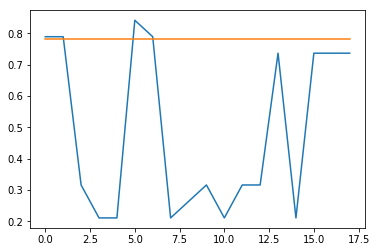

In [519]:
#effect of features on test accuracy 
plt.plot(test_acc)
plt.plot(train_acc)

In [520]:
#l1 penalized LR
LogRegl1=LogisticRegression(solver='liblinear',penalty='l1',fit_intercept=True)
LogRegl1.fit(features,target)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [521]:
LogRegl1.coef_

array([[ 0.02898982, -0.19713355,  0.18996756,  0.        ,  0.        ,
        -0.25792368,  0.06178699, -0.03465082, -0.05422642,  0.        ,
         0.37229426,  0.18269284,  0.05476186, -0.16999075, -0.02468874,
         0.        ,  0.        ,  0.07020582]])

In [522]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(solver='liblinear',penalty='l1',fit_intercept=True), features, target, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[0.85714286 0.85714286 0.78571429 0.71428571 0.91666667]
0.8261904761904763


In [524]:
# predict class labels for the test set
predicted = LogRegl1.predict(df1_new)
print(predicted)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0']


In [525]:
# generate evaluation metrics
print(metrics.accuracy_score(label_test, predicted))

0.7894736842105263


In [526]:
print(metrics.confusion_matrix(label_test, predicted))
print(metrics.classification_report(label_test, predicted))

[[15  0]
 [ 4  0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.88        15
          1       0.00      0.00      0.00         4

avg / total       0.62      0.79      0.70        19



C:\Users\taksaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [528]:
train_acc_l1=[]
test_acc_l1=[]
for kq in range(1,19):
    X_new = SelectKBest(chi2, k=kq).fit_transform(features, target)
    LogReg_l1 = LogisticRegression(solver='liblinear',penalty='l1',fit_intercept=True)
    LogReg_l1.fit(X_new,target)
    scores = cross_val_score(LogisticRegression(solver='liblinear',penalty='l1',fit_intercept=True), features, target, scoring='accuracy', cv=5)
    train_acc_l1.append(scores.mean())
    X_new_test = SelectKBest(chi2, k=kq).fit_transform(df1_new, label_test)
    predicted_new = LogReg_l1.predict(X_new_test)
    test_acc_l1.append(metrics.accuracy_score(label_test, predicted_new))
 

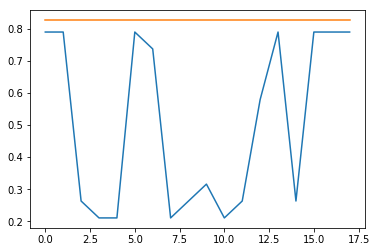

In [529]:
#effect of features on test accuracy 
plt.plot(test_acc_l1)
plt.plot(train_acc_l1)